In [123]:
import requests
import os
from dotenv import load_dotenv

def Login():
    load_dotenv()
    url = "https://auth.emsicloud.com/connect/token"

    payload = f"client_id={os.getenv('ClientID')}&client_secret={os.getenv('Secret')}&grant_type=client_credentials&scope=emsi_open"

    headers = {"Content-Type": "application/x-www-form-urlencoded"}

    response = requests.request("POST", url, data=payload, headers=headers)

    if response.status_code == 200:
       return response.json()['access_token']
    else: 
        return None



In [125]:
import json
import time
import requests

with open('combined_data.json', 'r') as file:
    data = json.load(file)

try:
    with open('job_skills_mapping.json', 'r') as json_file:
        job_skills_mapping = json.load(json_file)
except FileNotFoundError:
    job_skills_mapping = {}

def Extract_Skill(text, accessToken):
    url = "https://emsiservices.com/skills/versions/latest/extract/trace"
    
    payload = {
        "text": text,
        "confidenceThreshold": 0.6
    }
    headers = {
        "Authorization": f"Bearer {accessToken}",
        "Content-Type": "application/json"
    }

    response = requests.post(url, json=payload, headers=headers)

    if response.status_code == 200:
        extracted_skills = response.json()
        
        skills = [i['skill']['name'] for i in extracted_skills['data']['skills']]
        return skills
    else:
        accessToken = Login()
        if accessToken is None:
            return []
        return Extract_Skill(text, accessToken)

accessToken = Login()

batch_size = 40
batch_count = 0

for entry in data:
    job_link = entry.get('job_link')

    if job_link in job_skills_mapping:
        continue

    require = entry.get('require', '')
    time.sleep(3)
    
    skills = Extract_Skill(require, accessToken)

    if skills:
        job_skills_mapping[job_link] = skills

    batch_count += 1
    if batch_count % batch_size == 0:
        with open('job_skills_mapping.json', 'w') as json_file:
            json.dump(job_skills_mapping, json_file, indent=4)
        print(f"Saved progress after processing {batch_count} entries.")


with open('job_skills_mapping.json', 'w') as json_file:
    json.dump(job_skills_mapping, json_file, indent=4)

print("Job skills mapping saved to 'job_skills_mapping.json'")


Saved progress after processing 40 entries.
Saved progress after processing 80 entries.
Saved progress after processing 120 entries.
Saved progress after processing 160 entries.
Saved progress after processing 200 entries.
Saved progress after processing 240 entries.
Saved progress after processing 280 entries.
Saved progress after processing 320 entries.
Saved progress after processing 360 entries.
Saved progress after processing 400 entries.
Saved progress after processing 440 entries.
Saved progress after processing 480 entries.
Saved progress after processing 520 entries.
Saved progress after processing 560 entries.
Saved progress after processing 600 entries.
Saved progress after processing 640 entries.
Saved progress after processing 680 entries.
Saved progress after processing 720 entries.
Saved progress after processing 760 entries.
Saved progress after processing 800 entries.
Saved progress after processing 840 entries.
Saved progress after processing 880 entries.
Saved progre

In [36]:
job_url_mapping = {
    "Ai Engineer": [
        "ai-engineer", "ai-software-engineer", "machine-learning", "deep-learning", "ml-engineer", "artificial-intelligence"
    ],
    "Data Engineer": [
        "data-software-engineer", "data-engineer", "big-data", "etl", "hadoop", "spark", "data-pipelines"
    ],
    "Data Analyst": [
        "data-analyst", "data-analytics", "business-intelligence", "power-bi", "tableau", "sql-analyst"
    ],
    "Data Scientist": [
        "data-scientist", "ml-scientist", "data-mining", "statistical-modeling", "predictive-analytics", "python-r"
    ],
    "Business Analyst": [
        "business-analyst", "business-process", "requirements-gathering", "use-case", "business-systems"
    ],
    "Backend Developer": [
        "backend", "java-developer", "c-software", "c-net", "back-end", "python-odoo", "dotnet", "nodejs-developer", "php-developer", "java-developer", "golang-developer"
    ],
    "Frontend Developer": [
        "frontend", "front-end", "javascript", "reactjs", "angular", "vuejs"
    ],
    "Fullstack Developer": [
        "web-developer", "fullstack", "full-stack", "mern", "mean", "javascript-developer"
    ],
    "Mobile Developer": [
        "android", "ios", "mobile", "flutter", "react-native", "kotlin", "swift"
    ],
    "Embedded Engineer": [
        "embedded", "embedded-systems", "firmware", "hardware", "microcontroller", "rtos"
    ],
    "DevOps": [
        "devops", "ci-cd", "infrastructure", "automation", "kubernetes", "docker", "cloud-engineer"
    ],
    "Cybersecurity": [
        "security", "infosec", "cyber-defense", "penetration-testing", "network-security", "ethical-hacking"
    ],
    "Game Developer": [
        "game-developer", "-unity-", "cocos", "game-programming", "unreal-engine", "game-design"
    ]
}


In [37]:
import json
from itertools import chain
from collections import Counter

with open('job_skills_mapping.json', 'r') as infile:
    job_skill_mapping_content = json.load(infile)

categorized_jobs = {}

for title, param in job_url_mapping.items():
    categorized_jobs[title] = {
        'url': [],
        'skill': []
    }
    for e in param:
        categorized_jobs[title]['url'].extend([url for url in job_skill_mapping_content.keys() if e in url])
        
    categorized_jobs[title]['url'] = list(set(categorized_jobs[title]['url']))

    all_skills = chain.from_iterable(job_skill_mapping_content[url] for url in categorized_jobs[title]['url'])
    
    skill_counter = Counter(all_skills)
    
    categorized_jobs[title]['skill'] = dict(skill_counter)

with open('categorized_job_skill_mapping.json', 'w') as outfile:
    json.dump(categorized_jobs, outfile, indent=4)



In [21]:
!pip install matplotlib
!pip install seaborn

     ---------------------------------------- 0.0/167.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/167.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/167.0 kB ? eta -:--:--
     -- ------------------------------------- 10.2/167.0 kB ? eta -:--:--
     -- ------------------------------------- 10.2/167.0 kB ? eta -:--:--
     -- ------------------------------------- 10.2/167.0 kB ? eta -:--:--
     -- ------------------------------------- 10.2/167.0 kB ? eta -:--:--
     --------- --------------------------- 41.0/167.0 kB 196.9 kB/s eta 0:00:01
     --------- --------------------------- 41.0/167.0 kB 196.9 kB/s eta 0:00:01
     --------- --------------------------- 41.0/167.0 kB 196.9 kB/s eta 0:00:01
     --------- --------------------------- 41.0/167.0 kB 196.9 kB/s eta 0:00:01
     --------- --------------------------- 41.0/167.0 kB 196.9 kB/s eta 0:00:01
     --------- --------------------------- 41.0/167.0 kB 196.9 kB/s eta 0:00:01
     

In [64]:
import re
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np


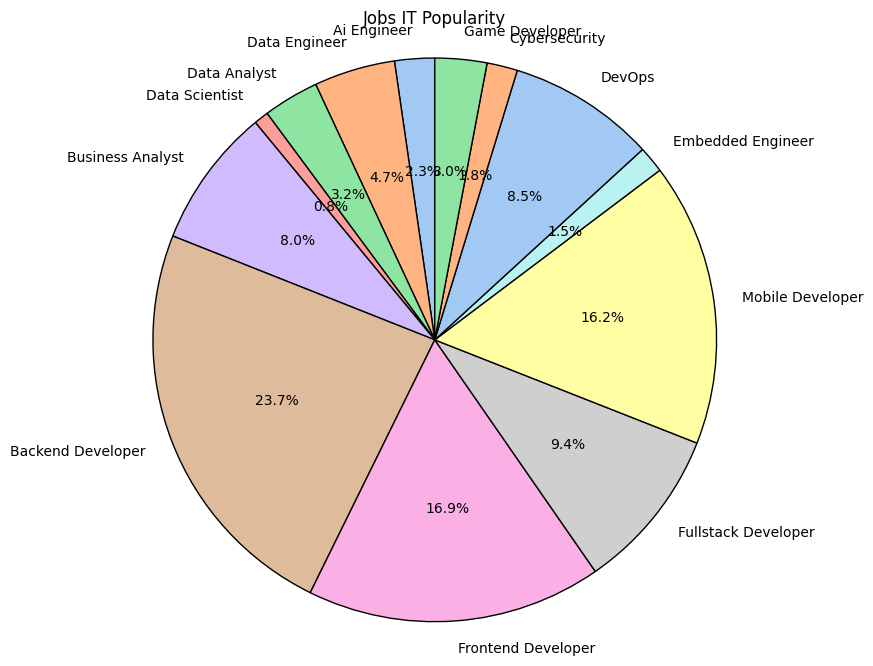

In [65]:

with open('categorized_job_skill_mapping.json', 'r') as infile:
    data = json.load(infile)

labels = list(data.keys())

total = sum(len(data[i]['url']) for i in data)

sizes = [(len(data[i]['url']) * 100) / total for i in data]

colors = sns.color_palette('pastel')[0:len(labels)]

plt.figure(figsize=(8, 8))  
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

plt.axis('equal')

plt.title('Jobs IT Popularity')

plt.show()


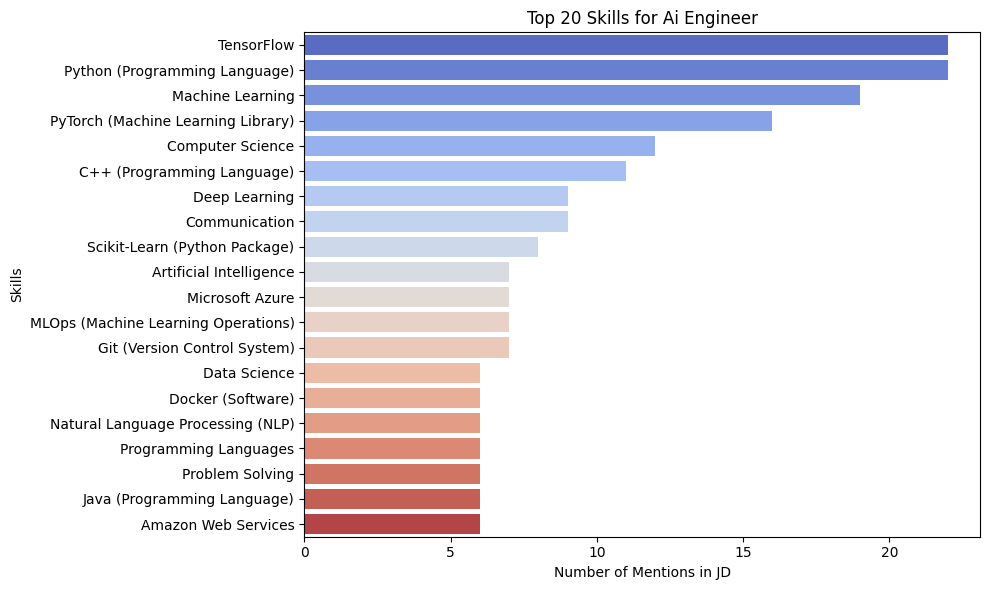

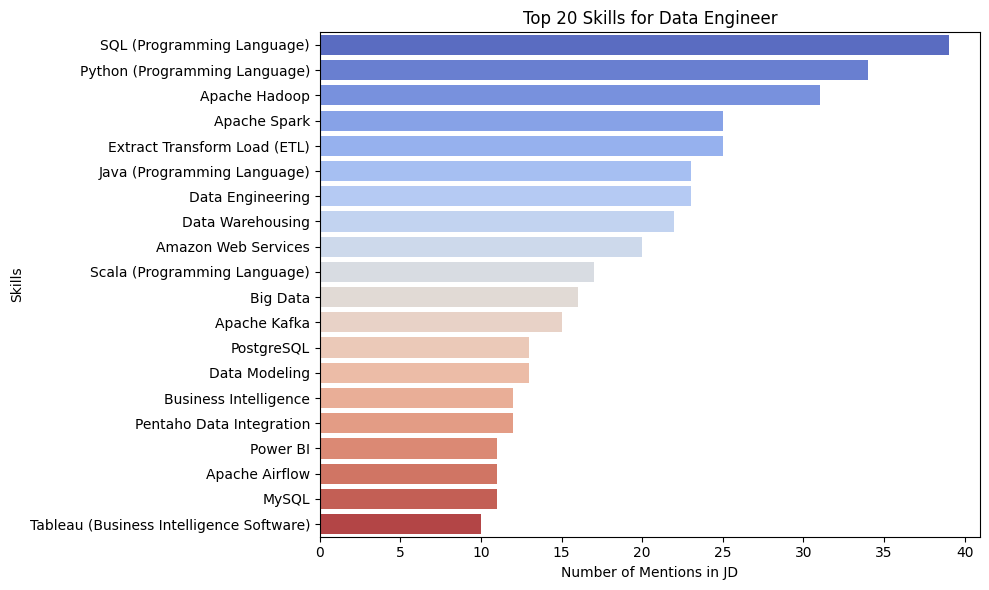

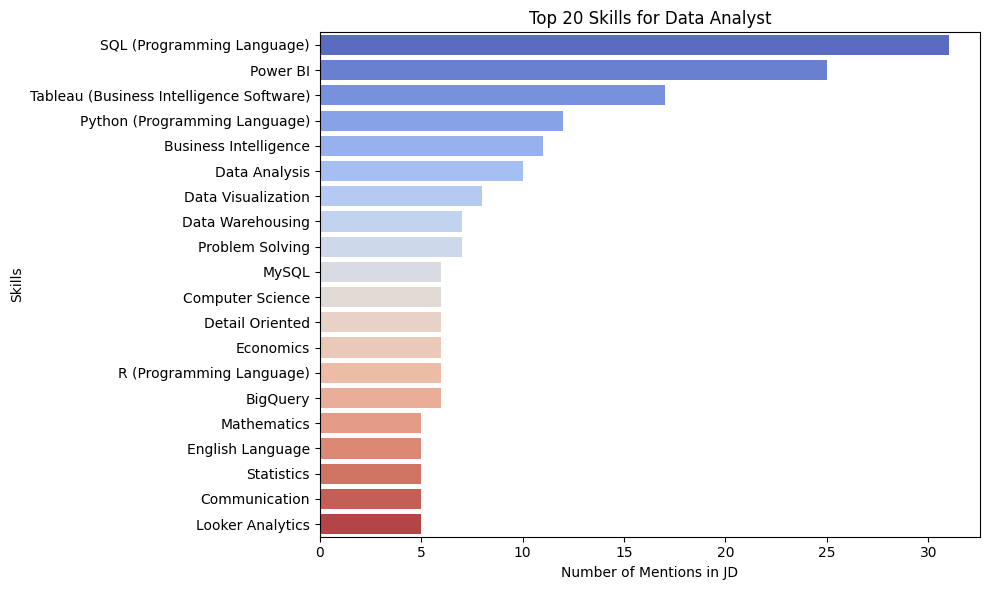

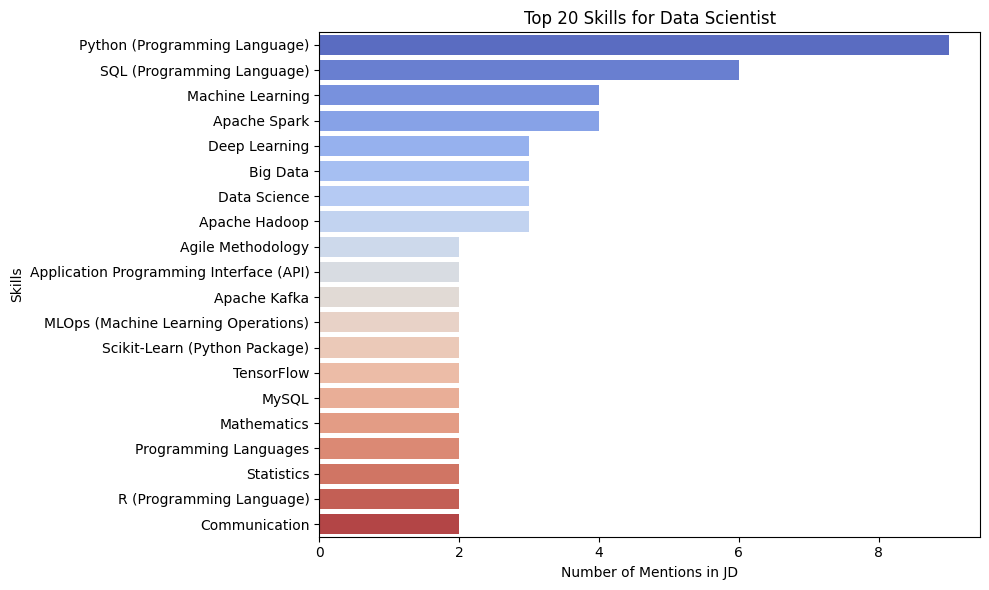

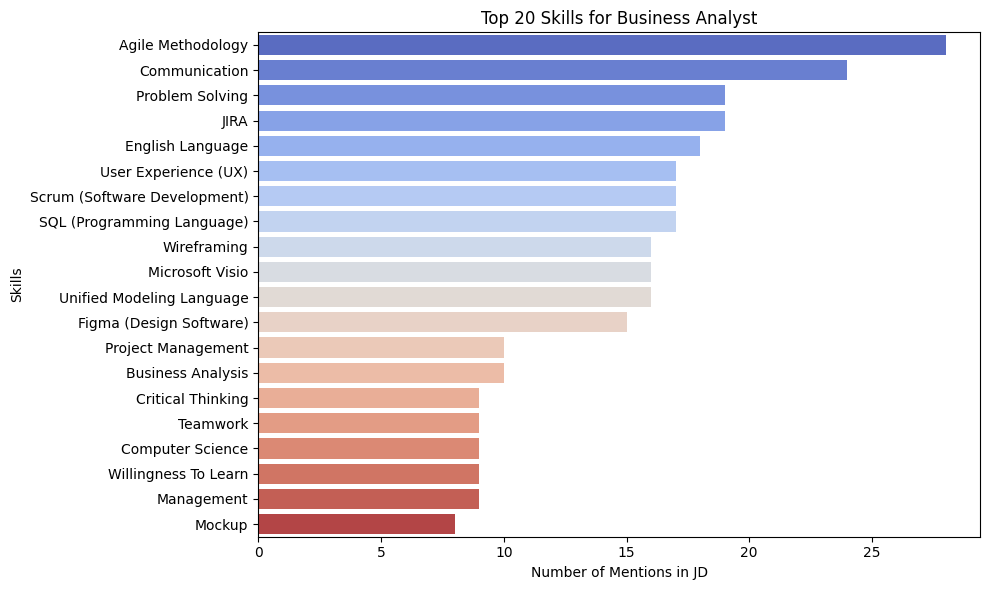

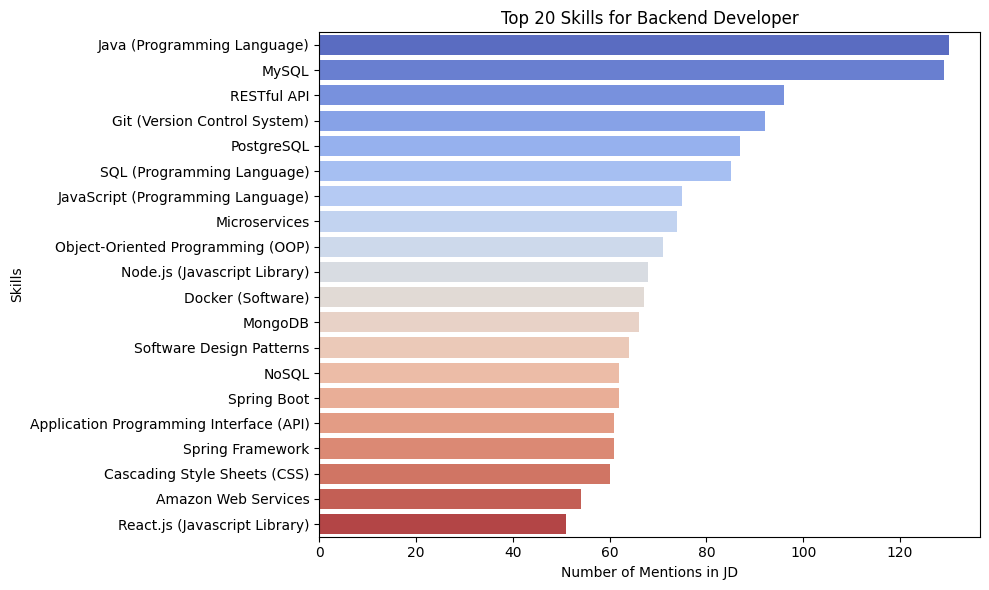

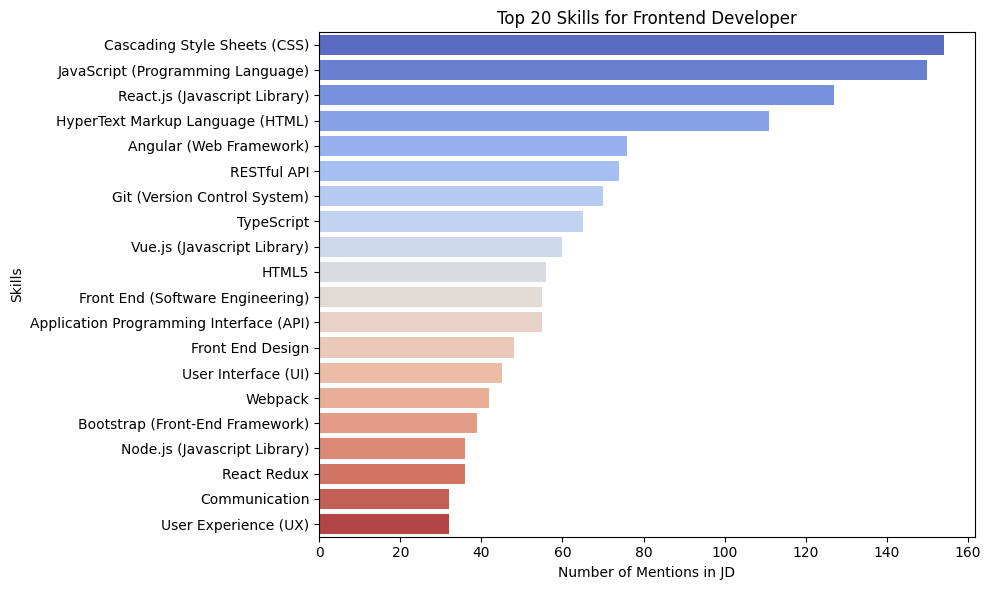

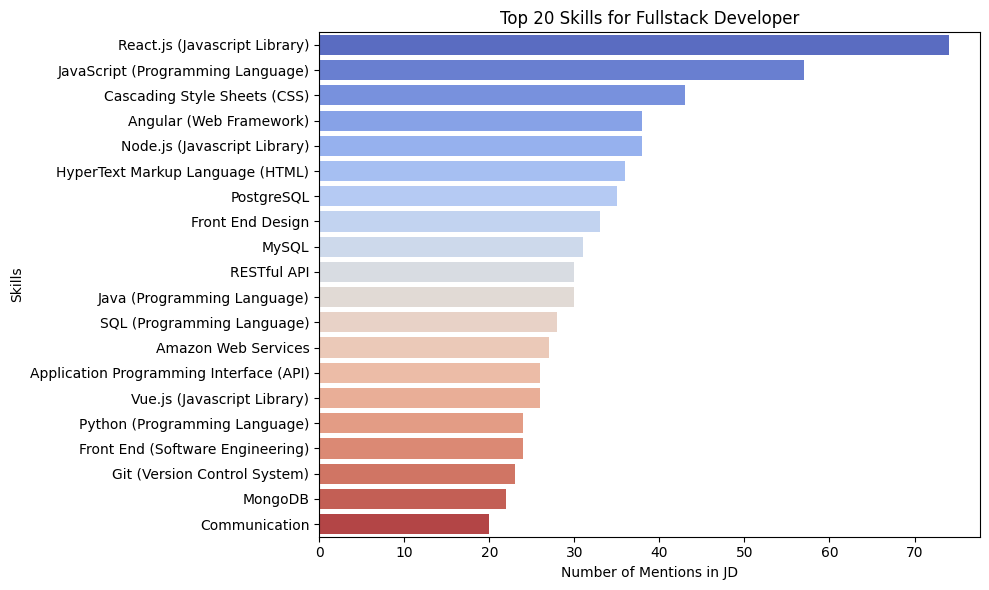

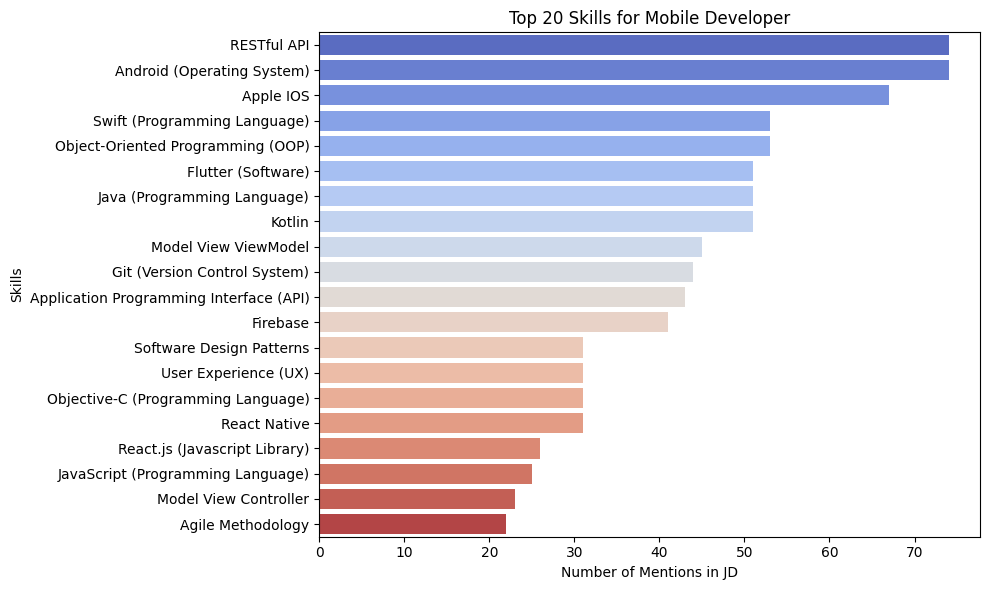

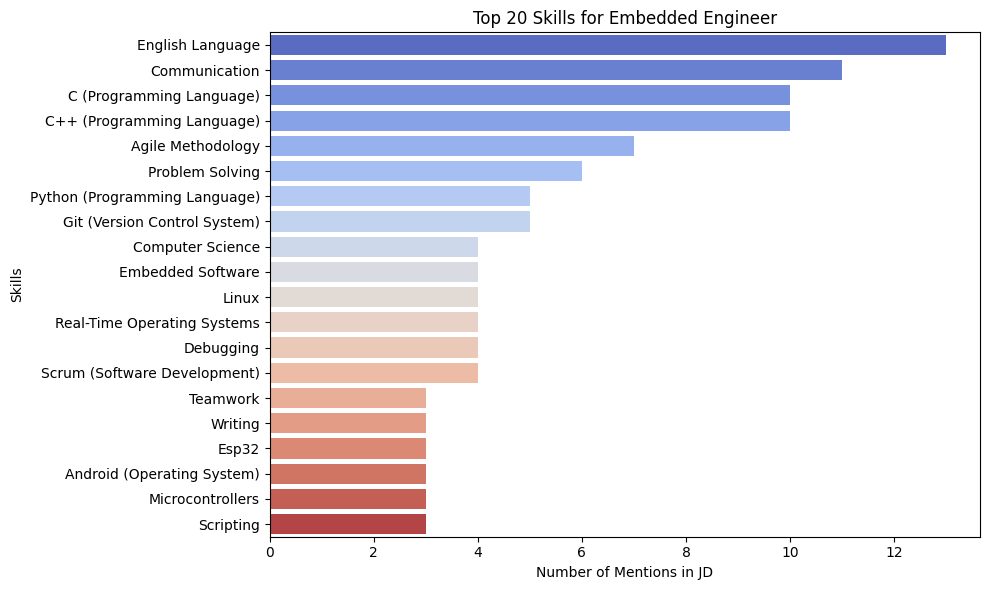

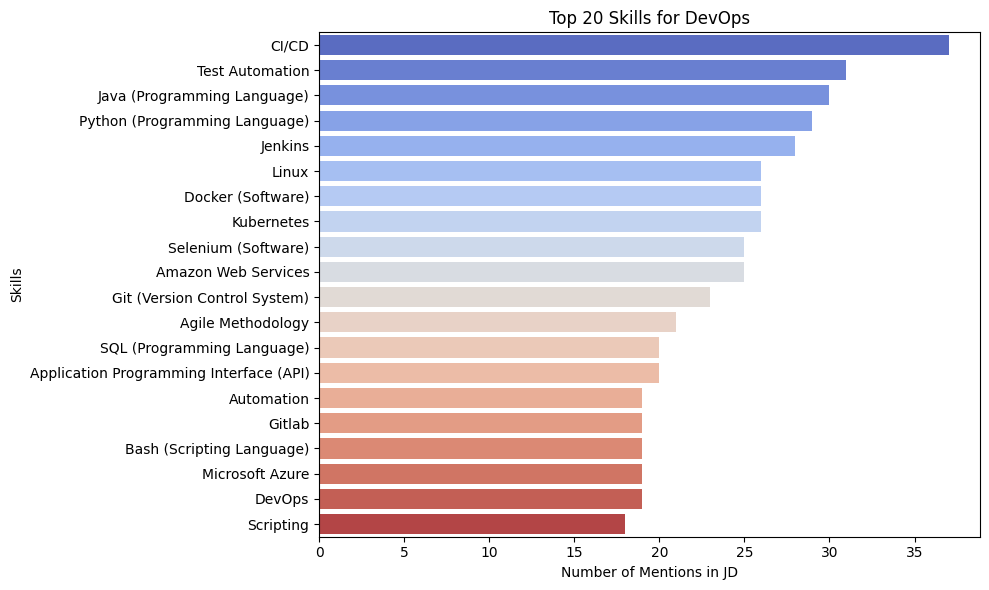

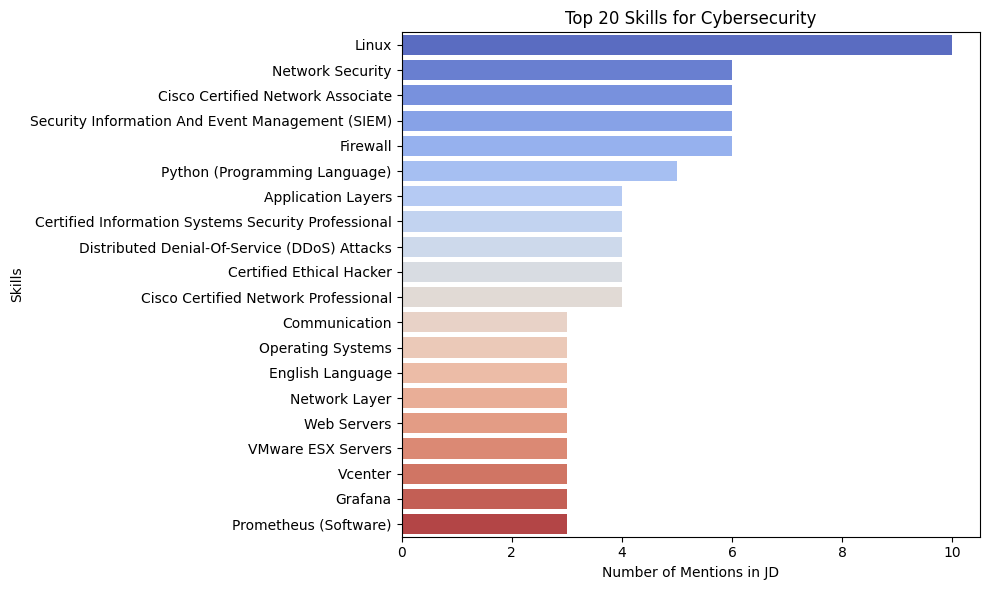

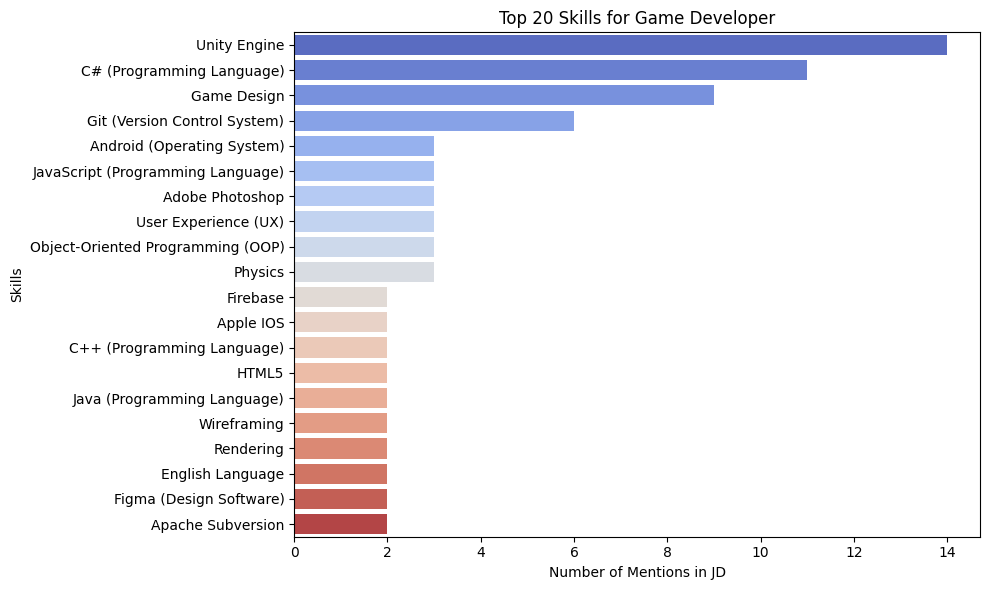

In [66]:

TOP_N = 20  

for job, content in data.items():
    skill_counter = Counter(content['skill'])

    counts = list(skill_counter.values())
    if not counts:
        continue 

    median_threshold = np.median(counts)

    filtered_skills = {skill: count for skill, count in skill_counter.items() if count >= median_threshold}

    sorted_skills = sorted(filtered_skills.items(), key=lambda x: x[1], reverse=True)[:TOP_N]

    if not sorted_skills:
        continue

    skills, counts = zip(*sorted_skills)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(skills), hue=list(skills), palette='coolwarm', legend=False)
    plt.xlabel('Number of Mentions in JD')
    plt.ylabel('Skills')
    plt.title(f'Top {TOP_N} Skills for {job}')

    plt.tight_layout()
    plt.show()

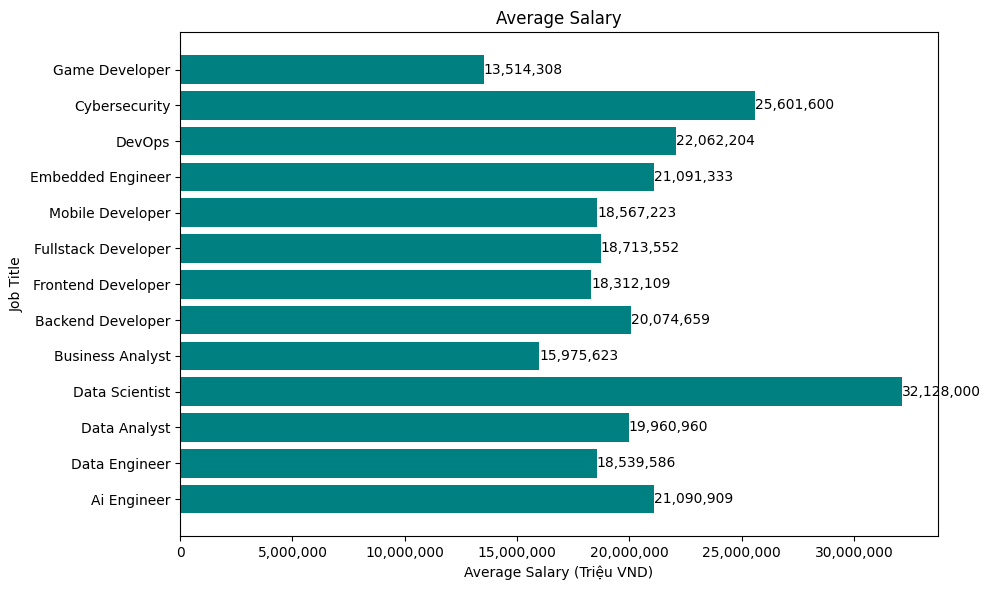

In [75]:
def parse_salary(salary_str):
    salary_str = salary_str.lower().strip()

    if "triệu" in salary_str:
        salary_str = salary_str.replace("triệu", "").strip()
        exchange_rate = 1_000_000 
        if "tới" in salary_str:
            max_salary = re.findall(r'\d+', salary_str)
            if max_salary:
                return (0, int(max_salary[0]) * exchange_rate)  
        elif 'trên' in salary_str:
            min_salary = re.findall(r'\d+', salary_str)
            if min_salary:
                return (int(min_salary[0]) * exchange_rate, 0)  
        elif "-" in salary_str:
            salary_values = re.findall(r'\d+', salary_str)
            if len(salary_values) >= 2:
                min_salary, max_salary = salary_values[:2]  
                return (int(min_salary) * exchange_rate, int(max_salary) * exchange_rate)  
        else:
            salary_value = re.findall(r'\d+', salary_str)
            if salary_value:
                return (int(salary_value[0]) * exchange_rate, int(salary_value[0]) * exchange_rate)


    elif "usd" in salary_str:
        salary_str = salary_str.replace("usd", "").strip()
        exchange_rate = 24_000 
        if "tới" in salary_str:
            max_salary = re.findall(r'\d+', salary_str)
            if max_salary:
                return (0, int(max_salary[0]) * exchange_rate) 
        elif 'trên' in salary_str:
            min_salary = re.findall(r'\d+', salary_str)
            if min_salary:
                return (int(min_salary[0]) * exchange_rate, 0) 
        elif "-" in salary_str:
            salary_values = re.findall(r'\d+', salary_str)
            if len(salary_values) >= 2:
                min_salary, max_salary = salary_values[:2]  
                return (int(min_salary) * exchange_rate, int(max_salary) * exchange_rate)  
        else:
            salary_value = re.findall(r'\d+', salary_str)
            if salary_value:
                return (int(salary_value[0]) * exchange_rate, int(salary_value[0]) * exchange_rate)

    return None



with open('combined_data.json', 'r') as infile:
    detailed_data = json.load(infile)

with open('categorized_job_skill_mapping.json', 'r') as infile:
    categorized_data = json.load(infile)

job_salary_data = {}

for job_title, content in categorized_data.items():
    urls = content['url']
    salary_list = []
    
    for url in urls:
        for job in detailed_data:
            if job['job_link'] == url:
                salary = job.get('salary', "")
                if "thoả thuận" not in salary.lower():  
                    parsed_salary = parse_salary(salary)
                    if parsed_salary == (0, 0): continue
                    if parsed_salary:
                        salary_list.append(parsed_salary)


    if salary_list:
        job_salary_data[job_title] = salary_list

average_salaries = {}

for job_title, salary_ranges in job_salary_data.items():
    total_salary = 0
    count = 0
    for salary in salary_ranges:
        avg_salary = sum(salary) / 2  
        total_salary += avg_salary
        count += 1
    average_salaries[job_title] = total_salary / count if count > 0 else 0


plt.figure(figsize=(10, 6))
bars = plt.barh(list(average_salaries.keys()), list(average_salaries.values()), color='teal')
plt.xlabel('Average Salary (Triệu VND)')
plt.ylabel('Job Title')
plt.title('Average Salary')

plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f}', 
             va='center')

plt.tight_layout()
plt.show()


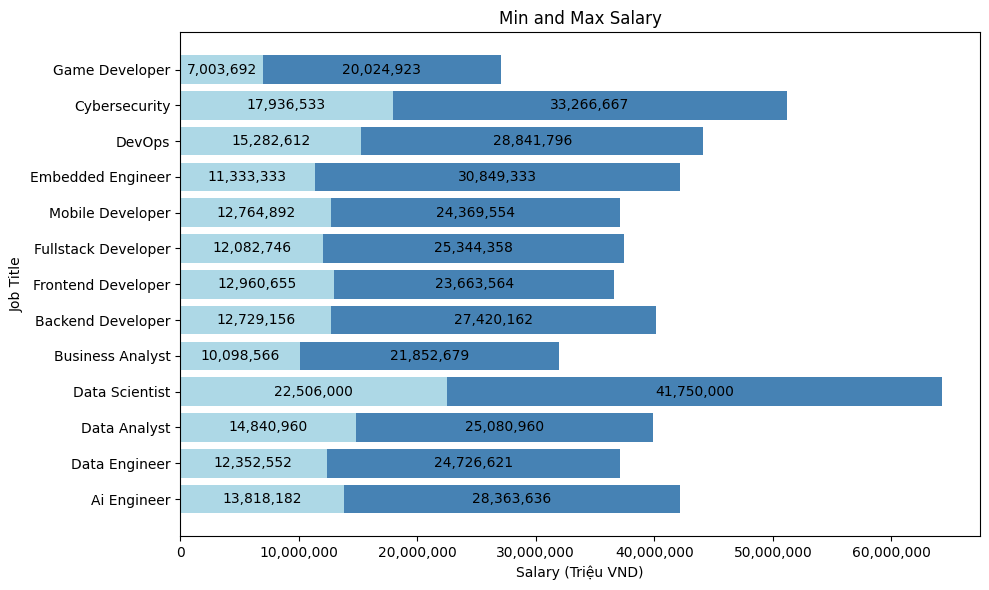

In [74]:
min_salaries = {}
max_salaries = {}

for job_title, salary_ranges in job_salary_data.items():
    min_salary_total = 0
    max_salary_total = 0
    count = 0
    
    for salary in salary_ranges:
        min_salary_total += salary[0]
        max_salary_total += salary[1]
        count += 1

    min_salaries[job_title] = min_salary_total / count if count > 0 else 0
    max_salaries[job_title] = max_salary_total / count if count > 0 else 0

job_titles = list(min_salaries.keys())
min_values = list(min_salaries.values())
max_values = list(max_salaries.values())

plt.figure(figsize=(10, 6))

plt.barh(job_titles, min_values, color='lightblue', label='Min Salary')

plt.barh(job_titles, max_values, left=min_values, color='steelblue', label='Max Salary')

plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.xlabel('Salary (Triệu VND)')
plt.ylabel('Job Title')
plt.title('Min and Max Salary')

for i, (min_val, max_val) in enumerate(zip(min_values, max_values)):
    plt.text(min_val / 2, i, f'{min_val:,.0f}', va='center', ha='center', color='black')
    plt.text(min_val + max_val / 2, i, f'{max_val:,.0f}', va='center', ha='center', color='black')

plt.tight_layout()
plt.show()
